In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LassoCV,Ridge,Lasso,RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from yellowbrick.regressor import ResidualsPlot
plt.rcParams['font.weight']="bold"
plt.rcParams['axes.labelweight']="bold"
plt.rcParams['font.size']="18"

In [51]:
with open('AmesHousing.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)

In [52]:
feature=data[0]
feature = [re.sub(r'\s+', '_', item) for item in feature]
housing_data=pd.DataFrame.from_records(data[1:],columns=feature)

# List of Descriptor Variables

In [53]:
feature

['Order',
 'PID',
 'MS_SubClass',
 'MS_Zoning',
 'Lot_Frontage',
 'Lot_Area',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Year_Built',
 'Year_Remod/Add',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Mas_Vnr_Area',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 '1st_Flr_SF',
 '2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Yr_Blt',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_

In [54]:
housing_data.drop(columns=["Order","PID"],inplace=True)

# Missing Values

In [55]:
for item in housing_data.columns:
    housing_data[item].replace(['','NA'],np.nan, inplace=True)

In [56]:
numeric_features = ['Lot_Frontage', 'Lot_Area', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 
        'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 
        'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 
        'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 
        'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 
        'SalePrice']
housing_data[numeric_features] = housing_data[numeric_features].astype('float')

In [57]:
Null_vals=housing_data.isnull().sum()
print("Missing Values is encountered in the following variables: \n", Null_vals[housing_data.isnull().sum()>0])

Missing Values is encountered in the following variables: 
 Lot_Frontage       490
Alley             2732
Mas_Vnr_Type        23
Mas_Vnr_Area        23
Bsmt_Qual           80
Bsmt_Cond           80
Bsmt_Exposure       83
BsmtFin_Type_1      80
BsmtFin_SF_1         1
BsmtFin_Type_2      81
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Electrical           1
Bsmt_Full_Bath       2
Bsmt_Half_Bath       2
Fireplace_Qu      1422
Garage_Type        157
Garage_Yr_Blt      159
Garage_Finish      159
Garage_Cars          1
Garage_Area          1
Garage_Qual        159
Garage_Cond        159
Pool_QC           2917
Fence             2358
Misc_Feature      2824
dtype: int64


In [58]:
df_lots = housing_data[['Lot_Frontage','Lot_Config', 'Lot_Shape']]
mean_df = df_lots.groupby(['Lot_Shape']).mean().reset_index()
#mean_df
housing_data['Lot_Frontage'] = housing_data.apply(lambda x : mean_df[mean_df['Lot_Shape']== x['Lot_Shape']]['Lot_Frontage'].values[0] \
                                                 if x['Lot_Frontage']!=x['Lot_Frontage'] else x['Lot_Frontage'],axis=1)
#mean_df
#del housing_data['Lot_Frontage_Mod']
#housing_data[['Lot_Frontage_Mod','Lot_Frontage']]
#housing_data.loc[housing_data['Lot_Frontage'].isnull(),['Lot_Frontage_Mod','Lot_Frontage','Lot_Shape']]

In [59]:

# Group 1:
group_1 = [
    'Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu', 'Garage_Type',
    'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Bsmt_Qual', 'Bsmt_Cond',
    'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Mas_Vnr_Type'
]
housing_data[group_1] = housing_data[group_1].fillna("None")

# Group 2:
group_2 = [
    'Garage_Area', 'Garage_Cars', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
    'Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Mas_Vnr_Area'
]

housing_data[group_2] = housing_data[group_2].fillna(0)

# Group 3:
group_3a = ['Electrical'] 
imputer = SimpleImputer(strategy='most_frequent')
housing_data[group_3a] = pd.DataFrame(imputer.fit_transform(housing_data[group_3a]), index=housing_data.index)
housing_data.Garage_Yr_Blt = housing_data.Garage_Yr_Blt.fillna(0)

In [60]:
housing_data.to_csv("clean_data.csv")

# Data Visualization / Outlier Detection

In [61]:
corr_mat = housing_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(5)

SalePrice       1.000000
Overall_Qual    0.799262
Gr_Liv_Area     0.706780
Garage_Cars     0.647562
Garage_Area     0.640138
Name: SalePrice, dtype: float64

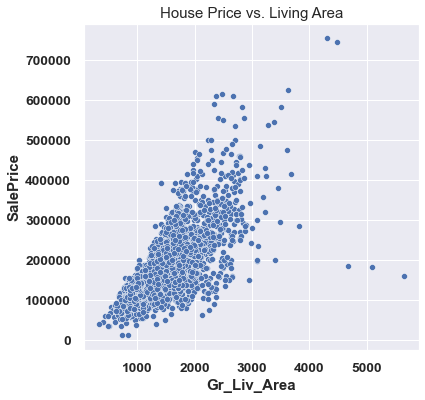

In [62]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice',data=housing_data)
title = plt.title('House Price vs. Living Area')

In [63]:
outlier_index = housing_data[(housing_data.Gr_Liv_Area > 4000)].index
#print(len(outlier_index))
housing_data.drop(index=outlier_index , inplace= True)
#print(len(housing_data))


# Categorical Data Visualization

Answer questions like : How many categories in each feature ? How rare is each category ? These visualizations will help in developing our prediction pipeline

In [64]:
from math import ceil
from itertools import zip_longest

In [65]:
categorical_feature=housing_data.select_dtypes(include=["object"]).columns.to_list()
categorical_data=housing_data[categorical_feature]

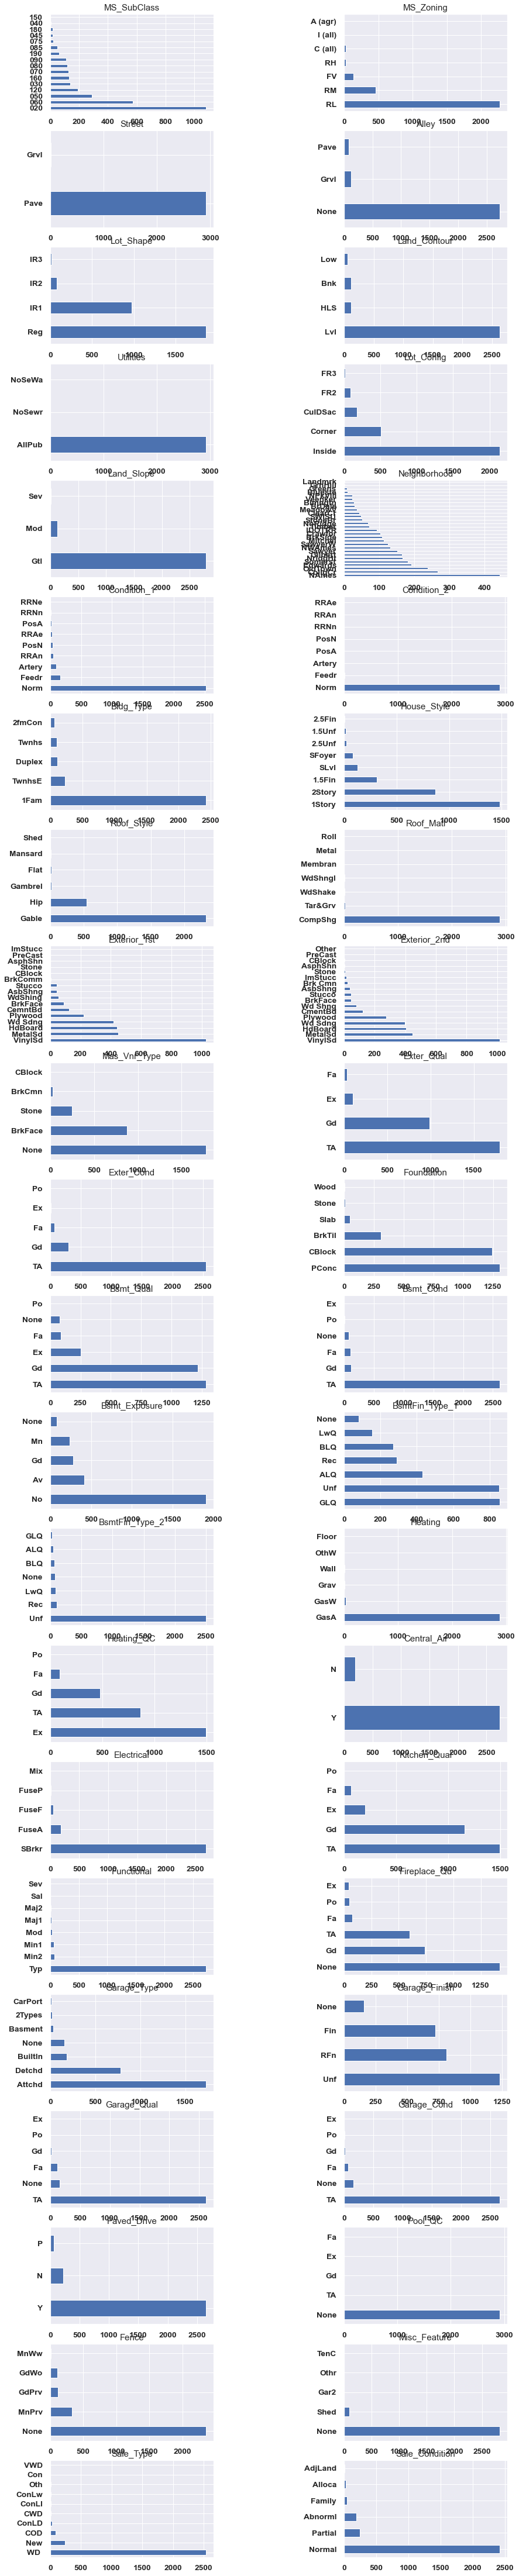

In [66]:
n_string_features = categorical_data.shape[1]
nrows, ncols = ceil(n_string_features / 2), 2

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(categorical_data, axs.ravel()):


    categorical_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

In [67]:
categorical_feature

['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Sale_Type',
 'Sale_Condition']

In [68]:
housing_data['houseage'] = housing_data.Yr_Sold - housing_data.Year_Built
housing_data['IsRemodeled'] = np.where(housing_data["Year_Remod/Add"] == housing_data.Year_Built, 0, 1)
housing_data.drop(["Yr_Sold","Year_Built","Year_Remod/Add"],inplace=True, axis=1)

In [69]:
##Dropping Features
housing_data.drop(["Street", "Utilities", "Condition_2", "Roof_Matl", "Heating", "Pool_QC", "Pool_Area"], inplace=True , axis=1)
#housing_data.select_dtypes(include='object').info()
##Encoding Ordinal Variables
lot_shape_dict = {'Reg':0,'IR1':1,'IR2':1,'IR3':1}
housing_data['Lot_Shape'] = housing_data['Lot_Shape'].map(lot_shape_dict)

land_shape_dict = {'Gtl':0,'Mod':1,'Sev':2}
housing_data['Land_Slope'] = housing_data['Land_Slope'].map(land_shape_dict)

ext_qual = {'Ex':2,'Fa':-1,'Gd':1,'TA':0,'Po':-2,'None':-1.25}
housing_data['Exter_Qual'] = housing_data['Exter_Qual'].map(ext_qual)
housing_data['Exter_Cond'] = housing_data['Exter_Cond'].map(ext_qual)
housing_data['Bsmt_Qual'] = housing_data['Bsmt_Qual'].map(ext_qual)
housing_data['Bsmt_Cond'] = housing_data['Bsmt_Cond'].map(ext_qual)
housing_data['Heating_QC'] = housing_data['Heating_QC'].map(ext_qual)
housing_data['Kitchen_Qual'] = housing_data['Kitchen_Qual'].map(ext_qual)
housing_data['Fireplace_Qu'] = housing_data['Fireplace_Qu'].map(ext_qual)
housing_data['Garage_Qual'] = housing_data['Garage_Qual'].map(ext_qual)
housing_data['Garage_Cond'] = housing_data['Garage_Cond'].map(ext_qual)

bsmt_expo = {'Gd':3, 'No':0 , 'Mn':1, 'Av':2, 'None':-1}
housing_data['Bsmt_Exposure'] = housing_data['Bsmt_Exposure'].map(bsmt_expo)

fin_map_type = {'BLQ':2, 'Rec':1, 'ALQ':3, 'GLQ':4, 'Unf':-0.5, 'LwQ':0, 'None':-1}
housing_data['BsmtFin_Type_1'] = housing_data['BsmtFin_Type_1'].map(fin_map_type)
housing_data['BsmtFin_Type_2'] = housing_data['BsmtFin_Type_2'].map(fin_map_type)

elec_type = {'SBrkr':3, 'FuseA':2, 'FuseF':1, 'FuseP':0, 'Mix':-1}
housing_data['Electrical'] = housing_data['Electrical'].map(elec_type)

fun_type = {'Typ':4, 'Mod':1, 'Min1':3, 'Min2':2, 'Maj1':0, 'Maj2':-1, 'Sev':-2, 'Sal':-3}
housing_data['Functional'] = housing_data['Functional'].map(fun_type)

gar_fin = {'Fin':2, 'Unf':0, 'RFn':1, 'None':-1}
housing_data['Garage_Finish'] = housing_data['Garage_Finish'].map(gar_fin)

pavd = {'P':0, 'Y':1, 'N':-1}
housing_data['Paved_Drive'] = housing_data['Paved_Drive'].map(pavd)

In [70]:
#housing_data['SalePrice'].groupby(housing_data['Exter_Qual']).describe(percentiles=[0.25,0.5,0.75,0.95])
#housing_data['SalePrice'].groupby(housing_data['Exter_Cond']).describe(percentiles=[0.25,0.5,0.75,0.95])
#housing_data['SalePrice'].groupby(housing_data['Bsmt_Qual']).describe(percentiles=[0.25,0.5,0.75,0.95])
#housing_data['SalePrice'].groupby(housing_data['Bsmt_Cond']).describe(percentiles=[0.25,0.5,0.75,0.95])
#housing_data['SalePrice'].groupby(housing_data['Bsmt_Exposure']).describe(percentiles=[0.25,0.5,0.75,0.95])
#tmp_df = housing_data['SalePrice'].groupby(housing_data['BsmtFin_Type_1']).describe(percentiles=[0.25,0.5,0.75,0.95]).reset_index()
#tmp_df = housing_data['SalePrice'].groupby(housing_data['Functional']).describe(percentiles=[0.25,0.5,0.75,0.95]).reset_index()
#tmp_df.sort_values(by='50%',ascending=True,inplace=True)
#tmp_df
#housing_data['SalePrice'].groupby(housing_data['Land_Slope']).describe(percentiles=[0.25,0.5,0.75,0.95])
#housing_data['SalePrice'].groupby(housing_data['Lot_Shape']).describe(percentiles=[0.25,0.5,0.75,1.0])

In [71]:
nom_fi = list(housing_data.select_dtypes(include='object'))
#nom_fi
X = pd.get_dummies(housing_data,columns=nom_fi,drop_first=True)

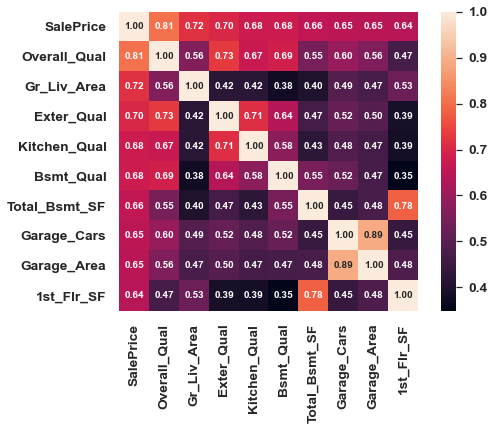

In [72]:
corr_mat=X.corr()
k = 10 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [73]:
X.to_csv("final_data.csv")

In [74]:
columns = list(X)

In [75]:
Y = np.log(X['SalePrice'].to_numpy())
X.drop(columns='SalePrice',inplace=True)
columns = list(X)
X = X.to_numpy()

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [77]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [78]:
model = Lasso()
# define model evaluation method
cv = KFold(n_splits=10)
# define grid
grid = dict()
grid['alpha'] =[1e-4,1e-3, 1e-2, 0.1, 1, 10, 100]
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MSE: %.3f' % np.abs(results.best_score_))
print('Config: %s' % results.best_params_)

MSE: 0.013
Config: {'alpha': 0.001}


In [79]:
blank_array = np.zeros((len(grid['alpha']),10))
#print(blank_array.shape)
split = ['split{}_test_score'.format(no) for no in range(10)]
for index,elem in enumerate(split):
    blank_array[:,index] = results.cv_results_[elem]

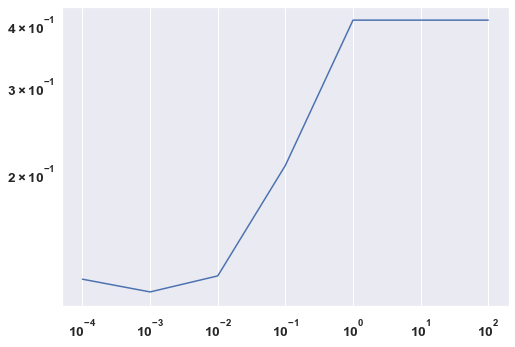

In [80]:
x = np.array(grid['alpha'])
y = np.sqrt(-blank_array.mean(axis=1))
plt.loglog(x,y)
#plt.grid(axis='both',color=0.1)

In [81]:
final_model = Lasso(alpha=0.001)
final_model.fit(X_train,Y_train)
Y_pred = final_model.predict(X_test)
print("test rmse",mean_squared_error(Y_test,Y_pred))

test rmse 0.011269177478656587


In [82]:
Y_pred= final_model.predict(X_train)
print("train rmse",mean_squared_error(Y_train,Y_pred))

train rmse 0.011107818311256889


In [83]:
np.sum(final_model.coef_!=0)

126

<AxesSubplot:xlabel='Coef', ylabel='Feature'>

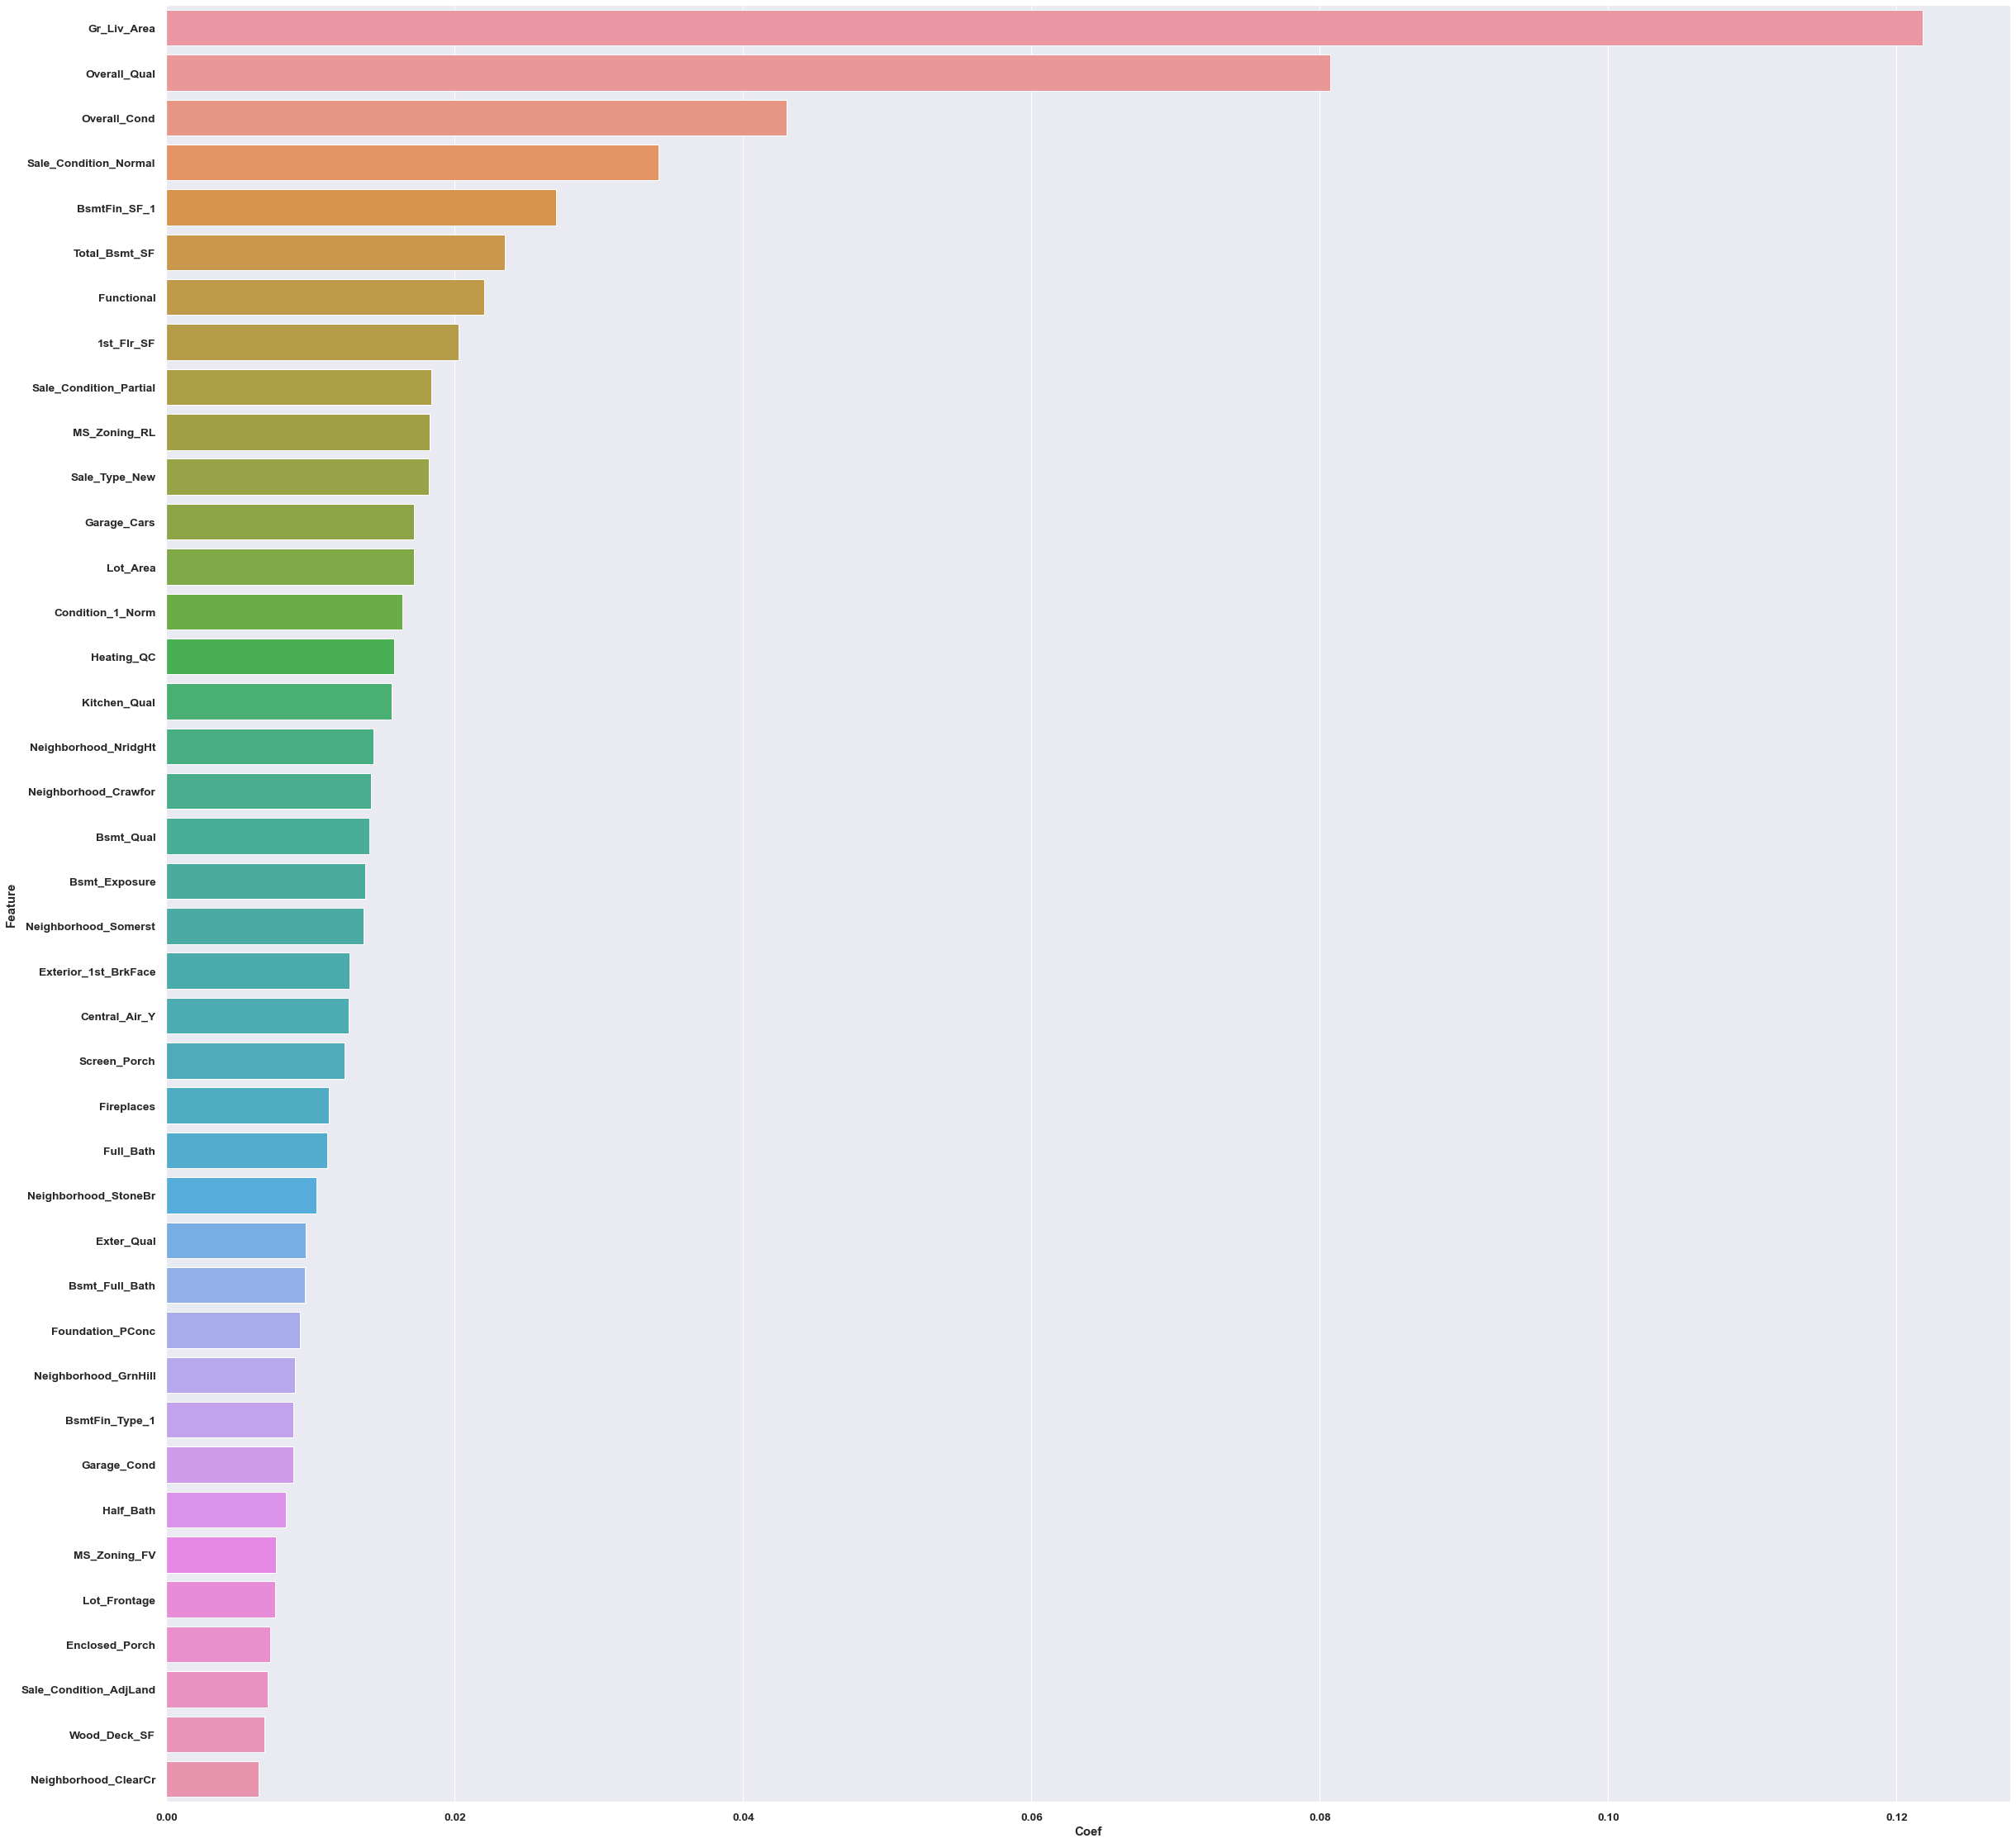

In [84]:
lasso_df = pd.DataFrame(columns=['Feature','Coef'])
lasso_df['Feature'] = columns
lasso_df['Coef'] = final_model.coef_
data = lasso_df.sort_values(by='Coef',ascending=False)
plt.figure(figsize=(40,40))
sns.barplot(data=data[:40],y='Feature',x='Coef')

In [85]:
len(data[data["Coef"]>0])

83

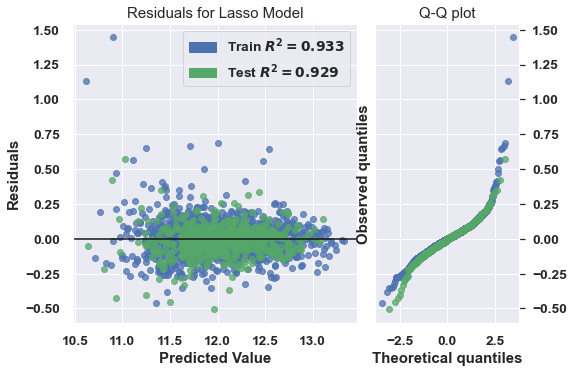

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
model = Lasso(alpha=0.001)
visualizer = ResidualsPlot(model, hist=False, qqplot=True)

visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.show()    

# Ridge Regression

In [87]:
model = Ridge()
# define model evaluation method
cv = KFold(n_splits=10)
# define grid
grid = dict()
grid['alpha'] =[1e-4,1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('RMSE: %.3f' % np.abs(results.best_score_))
print('Config: %s' % results.best_params_)

RMSE: 0.014
Config: {'alpha': 100}


In [88]:
blank_array = np.zeros((len(grid['alpha']),10))
#print(blank_array.shape)
split = ['split{}_test_score'.format(no) for no in range(10)]
for index,elem in enumerate(split):
    blank_array[:,index] = results.cv_results_[elem]

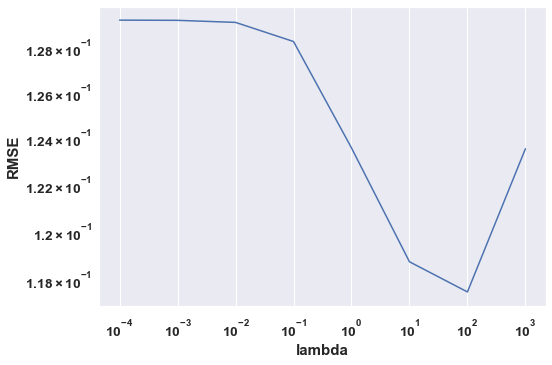

In [89]:
x = np.array(grid['alpha'])
y = np.sqrt(-blank_array.mean(axis=1))
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.loglog(x,y)
#plt.grid(axis='both',color=0.1)

In [90]:
final_model_ridge = Ridge(alpha=100)
final_model_ridge.fit(X_train,Y_train)
Y_pred_ridge = final_model_ridge.predict(X_test)
print(mean_squared_error(Y_test,Y_pred_ridge))

0.011509753977984476


In [91]:
Y_pred=final_model_ridge.predict(X_train)
print(mean_squared_error(Y_train,Y_pred))

0.010946363565783681


<AxesSubplot:xlabel='Coef', ylabel='Feature'>

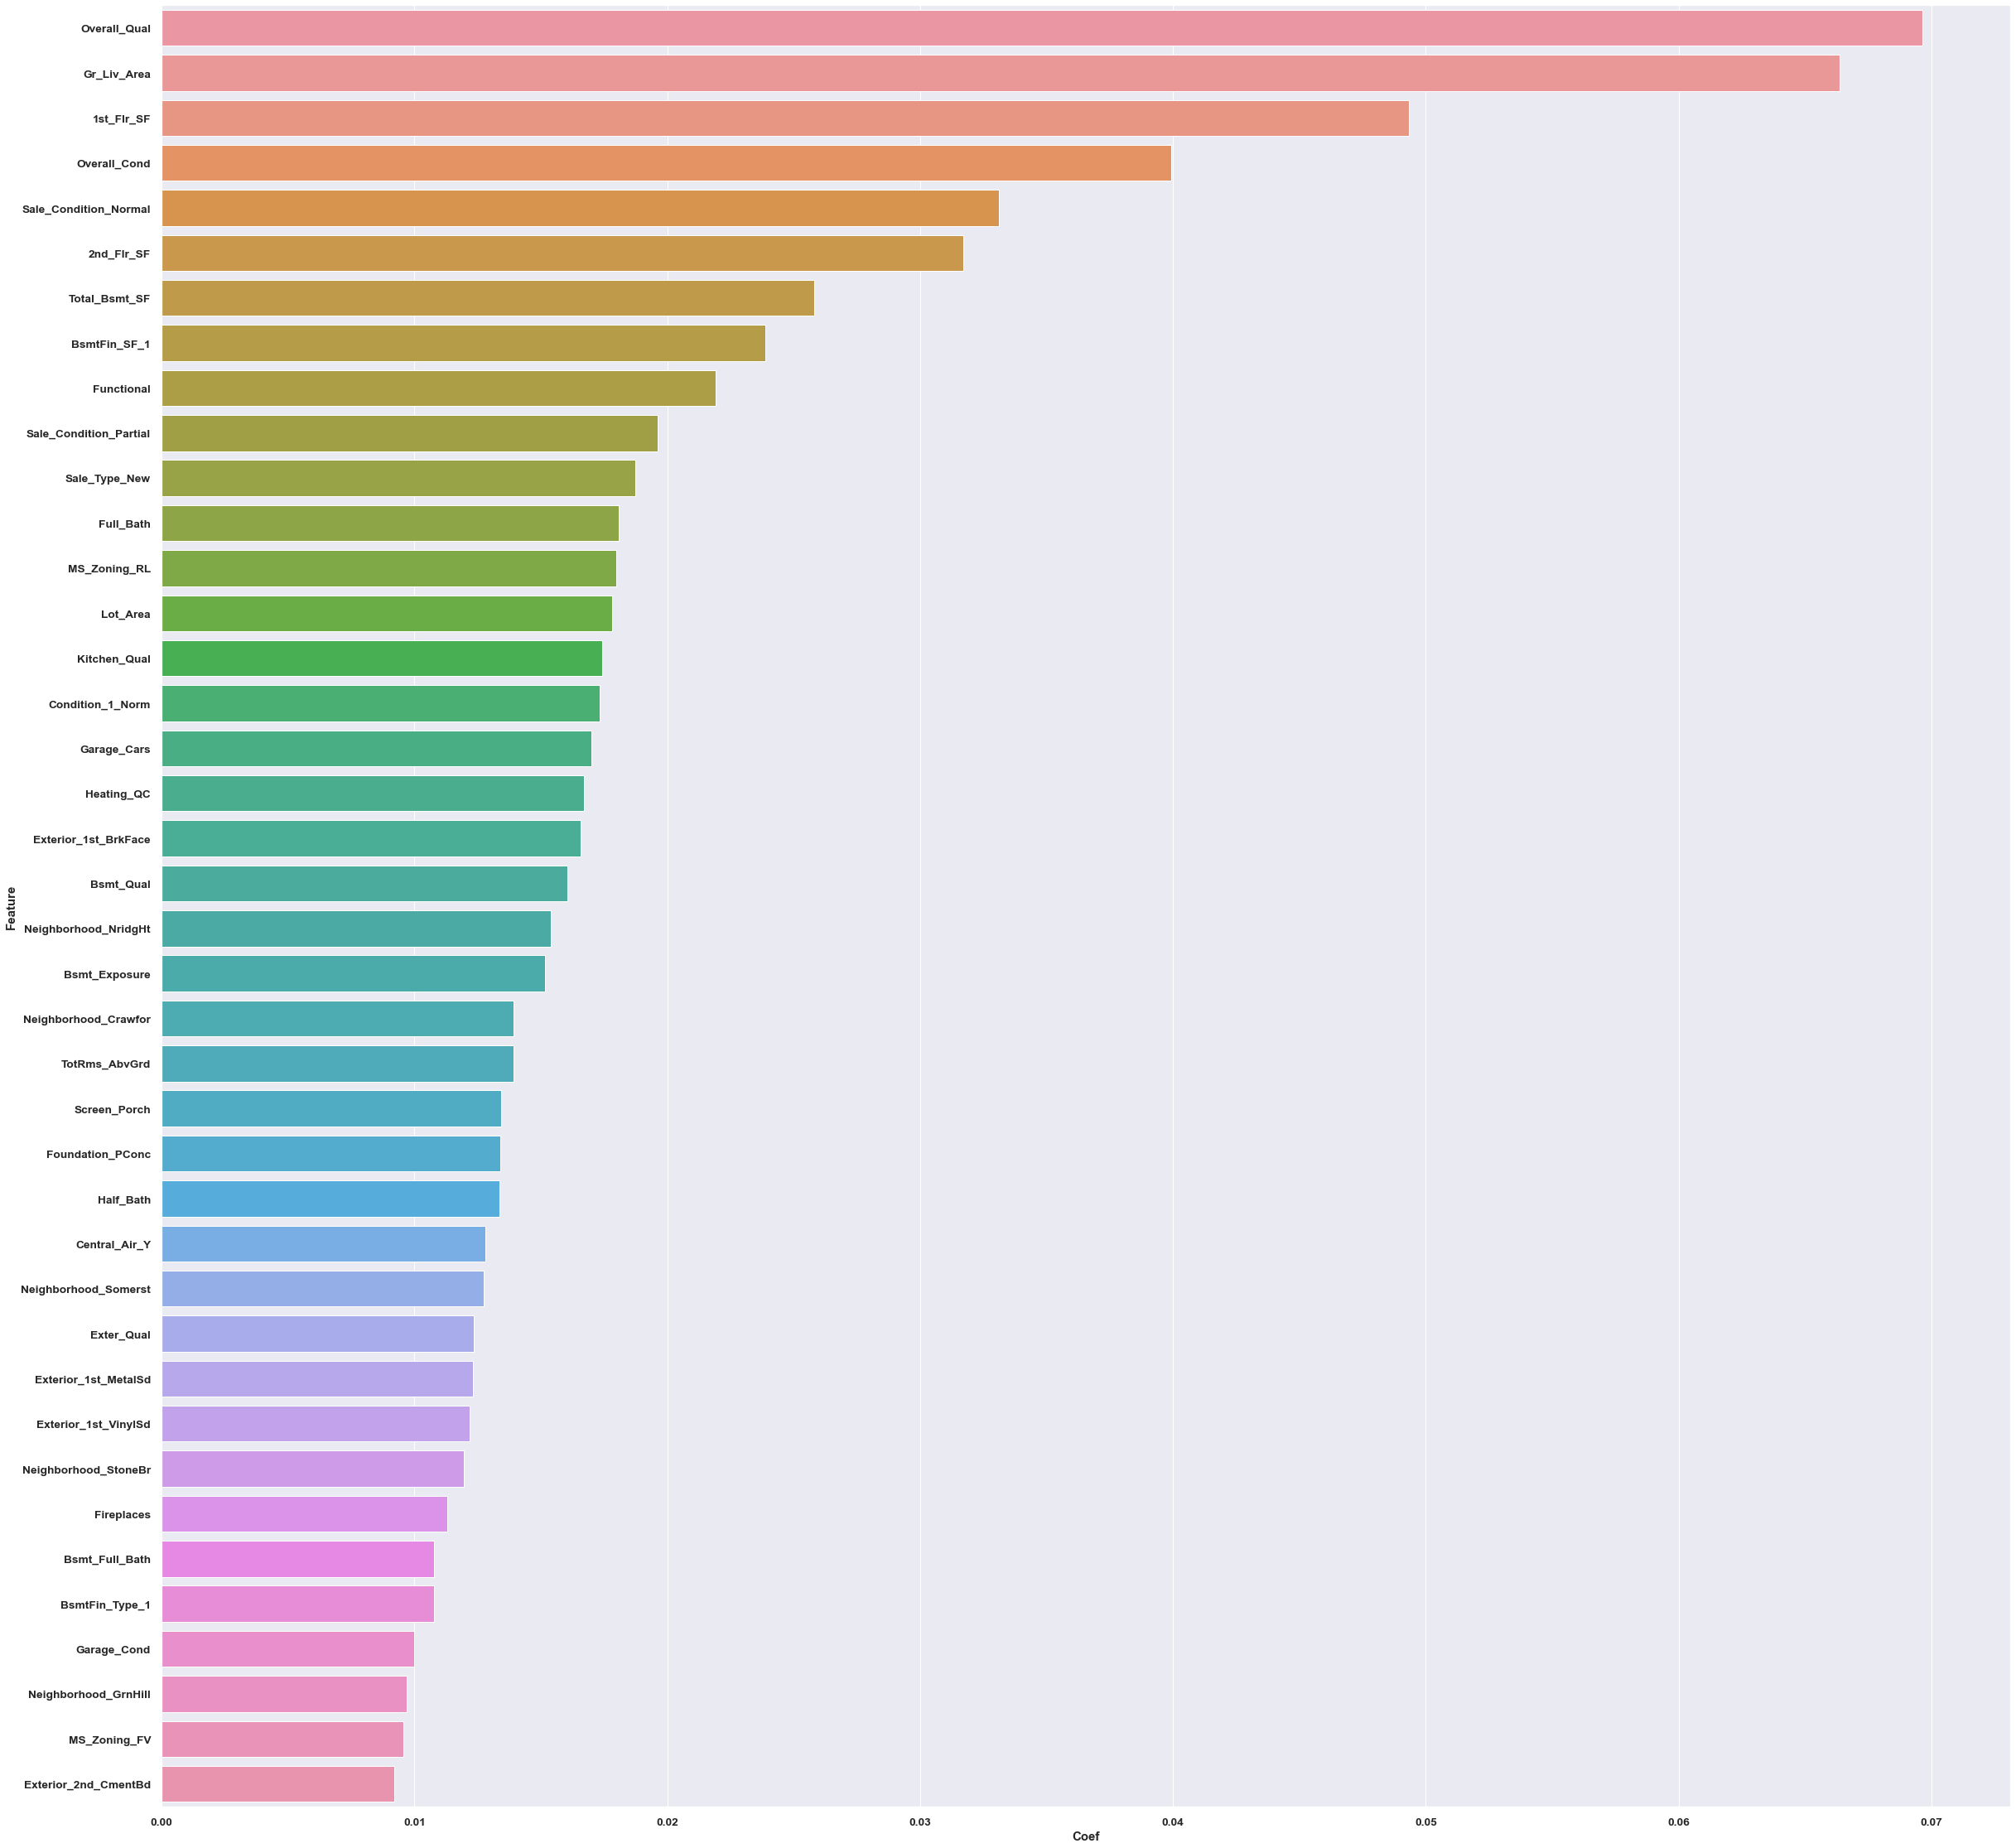

In [92]:
Ridge_df = pd.DataFrame(columns=['Feature','Coef'])
Ridge_df['Feature'] = columns
Ridge_df['Coef'] = final_model_ridge.coef_
data = Ridge_df.sort_values(by='Coef',ascending=False)
plt.figure(figsize=(40,40))
sns.barplot(data=data[:40],y='Feature',x='Coef')

In [93]:
data

Feature      Coef
4             Overall_Qual  0.069633
23             Gr_Liv_Area  0.066376
20              1st_Flr_SF  0.049329
5             Overall_Cond  0.039924
199  Sale_Condition_Normal  0.033111
..                     ...       ...
51         MS_SubClass_030 -0.011052
93    Neighborhood_MeadowV -0.012390
100   Neighborhood_OldTown -0.013892
63         MS_SubClass_160 -0.016144
49                houseage -0.041209

[201 rows x 2 columns]

In [94]:
blank_array = np.zeros((len(grid['alpha']),10))
#print(blank_array.shape)
split = ['split{}_test_score'.format(no) for no in range(10)]
for index,elem in enumerate(split):
    blank_array[:,index] = results.cv_results_[elem]

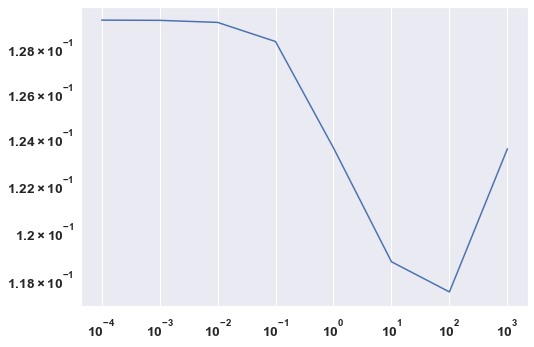

In [95]:
x = np.array(grid['alpha'])
y = np.sqrt(-blank_array.mean(axis=1))
plt.loglog(x,y)
#plt.grid(axis='both',color=0.1)

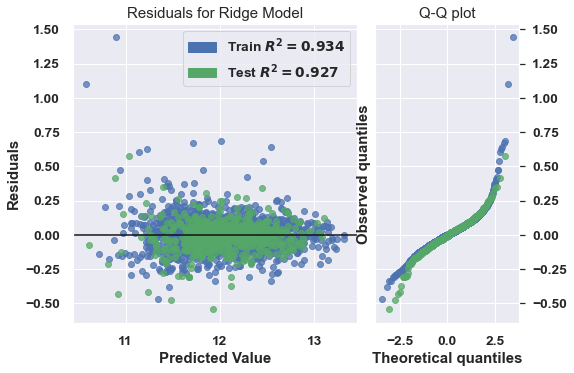

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [96]:
model = Ridge(alpha=100)
visualizer = ResidualsPlot(model, hist=False, qqplot=True)

visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.show()       

# Linear Regression

In [97]:
lr= LinearRegression().fit(X_train,Y_train)
prediction= lr.predict(X_test)
print(np.sqrt(mean_squared_error(prediction,Y_test)))

13020277.42812032


In [98]:
plt.figure(figsize=(12,12), dpi=800)
g=sns.lineplot(data=final_model.coef_)
plt.tick_params(axis="both",labelsize=18)
g.set_xlabel('Features', fontsize=18)
g.set_ylabel('Coefficients', fontsize=18)
g.legend(title='Models', loc='upper right', labels=['Lasso'], fontsize=14)
plt.savefig("Lasso.tiff")

In [99]:
plt.figure(figsize=(12,12), dpi=800)
g=sns.lineplot(data=lr.coef_, color='red')
plt.tick_params(axis="both",labelsize=18)
g.set_xlabel('Features', fontsize=18)
g.set_ylabel('Coefficients', fontsize=18)
g.legend(title='Models', loc='upper right', labels=['Multiple_Linear_Regression'], fontsize=14)
plt.savefig("LinearReg.tiff")

In [100]:
plt.figure(figsize=(12,12), dpi=800)
g=sns.lineplot(data=final_model.coef_)
sns.lineplot(data=final_model_ridge.coef_, color='red')
plt.tick_params(axis="both",labelsize=18)
g.set_xlabel('Features', fontsize=18)
g.set_ylabel('Coefficients', fontsize=18)
g.legend(title='Models', loc='upper right', labels=['Lasso', 'Ridge'], fontsize=14)
plt.savefig("LassovRidge.tiff")

In [101]:
Missing_df=pd.DataFrame(Null_vals[Null_vals>0]).reset_index()
Missing_df.rename(columns={'index':'Feature',0:'NullCount'},inplace=True)

In [102]:
Missing_df

Feature  NullCount
0     Lot_Frontage        490
1            Alley       2732
2     Mas_Vnr_Type         23
3     Mas_Vnr_Area         23
4        Bsmt_Qual         80
5        Bsmt_Cond         80
6    Bsmt_Exposure         83
7   BsmtFin_Type_1         80
8     BsmtFin_SF_1          1
9   BsmtFin_Type_2         81
10    BsmtFin_SF_2          1
11     Bsmt_Unf_SF          1
12   Total_Bsmt_SF          1
13      Electrical          1
14  Bsmt_Full_Bath          2
15  Bsmt_Half_Bath          2
16    Fireplace_Qu       1422
17     Garage_Type        157
18   Garage_Yr_Blt        159
19   Garage_Finish        159
20     Garage_Cars          1
21     Garage_Area          1
22     Garage_Qual        159
23     Garage_Cond        159
24         Pool_QC       2917
25           Fence       2358
26    Misc_Feature       2824

In [103]:
plt.figure(figsize=(12,12), dpi=800)
plt.tick_params(axis="both",labelsize=18)
sns.barplot(y="Feature",x="NullCount", data=Missing_df.head(10))
plt.xlabel('Null Counts',fontsize=22)
plt.ylabel('Feature',fontsize=22)

Text(0, 0.5, 'Feature')